# Informações Relevantes sobre os dados

Esse *dataset* foi disponibilizado publicamente no site da UCI Machine Learning Repository, disponível em: <http://archive.ics.uci.edu/ml/datasets/Bank+Marketing>. 

Os dados foram coletados do Banco de Portugal, em: <https://www.bportugal.pt/estatisticasweb>


# Variáveis Analisadas

### Características dos clientes:

1 - [idade] age (numeric)

2 - [emprego] job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - [estado_civil] marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - [educação] education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - [inadimplência] default: has credit in default? (categorical: "no","yes","unknown")

6 - [empréstimo_imobiliario] housing: has housing loan? (categorical: "no","yes","unknown")

7 - [empréstimo]: has personal loan? (categorical: "no","yes","unknown")

### Último contato feito:

8 - [forma_contato] contact: contact communication type (categorical: "cellular","telephone") 

9 - [mês_contato] month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - [dia_contato] day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - [duração_contato] duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Outros atributos do cliente na campanha:

12 - [num_contatos] campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - [dias_ultimo_contato] pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - [contatos_anteriores] previous: number of contacts performed before this campaign and for this client (numeric)

15 - [resultado_anterior] poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Contexto socioeconômico dos clientes:

16 - [indice_desemprego] emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - [CPI] cons.price.idx: consumer price index - monthly indicator (numeric)     

18 - [CCI] cons.conf.idx: consumer confidence index - monthly indicator (numeric)  

19 - [Euribor] euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - [num_desemprego] nr.employed: number of employees - quarterly indicator (numeric)

### Variável-Alvo:

21 - [resultado] y: has the client subscribed a term deposit? (binary: "yes","no")

# Valores Faltantes

Todos os valores faltantes foram imputados como "unknown".

# Importação de Dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("../dados/bank-additional-full.csv", sep=";")

dados = dados.rename(columns={
    "antigo":"novo"
})
dados.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Limpeza de Dados

Devemos verificar:
* estrutura
* granularidade
* escopo
* temporalidade
* corretude

Operações:
* Limpeza de NAs
* padronizações
* tipagem

## Lidando com os NA's

Os dados faltantes das colunas de "Características dos Clientes" foram imputados com a palavra "unknown". Para tratá-los, precisamos transformá-los em NaNs.

Além disso, os valores faltantes da coluna "pdays" foram imputados com "999". 

In [42]:
df = dados.copy()
df = df.apply(lambda x: x.replace('unknown', np.nan))
df["pdays"] = df["pdays"].replace(999, np.nan)

In [43]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Podemos observar que há valores faltantes nas colunas "default", "education", "job", "housing", "loan" e "pdays". Vamos verificar o quanto isso representa do total de amostras, individualmente.

In [44]:
tmp = df[["default", "education", "job", "housing", "loan", "pdays"]]
tmp.isna().sum().sort_values(ascending=False)/len(df)

pdays        0.963217
default      0.208726
education    0.042027
housing      0.024036
loan         0.024036
job          0.008012
dtype: float64

As colunas que contém +5% de NA's em relação à quantidade total de observações são: "default" e "pdays". Vamos verificar a correlação entre elas e o alvo. Caso não seja significante (+5%), optaremos por apagá-las assumindo que não haverá perda de informação.

Já as outras colunas contém uma baixa quantidade de dados faltantes, por isso é razoável remover todas as linhas que contenham ao menos um dado faltante.

In [45]:
tmp = df[["pdays","y"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação pdays-y:", tmp.corr()["y"][0].round(2))

tmp = df[["default","y"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação default-y:", tmp.corr()["y"][0].round(2))

df.drop(["default", "pdays"], axis=1, inplace=True) # apaga as colunas
df.dropna(inplace=True) # apaga os NA's das linhas restantes

correlação pdays-y: -0.03522348402414844
correlação default-y: -0.003688824291733997


# Análise Exploratória dos Dados (apontar padrões e formular perguntas)

Vamos verificar a maneira como os dados estão descritos.

O primeiro ponto a se considerar é de que o pandas realiza a tipagem das colunas de forma automática. Nesse sentido, caso haja algum NA na coluna, o csv viria com "unknown" e por conta dessa string, todos os dados da coluna seriam convertidos para o tipo "object", ou seja, não numérico. Como as únicas colunas que continham NA's são categóricas não ordinais, nenhuma tipagem foi feita de maneira errada. 

Dessa forma, a partir da função `df.info`, podemos verificar que as variáveis que contém números são: 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'. Ao visualizá-las, confirma-se que as variáveis  


In [48]:
print("Nomes das colunas: ", list(df.columns))
df.iloc[:, 9:19].head() # Colunas numéricas
# fazer analises

Nomes das colunas:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Visualização das estatísticas descritivas

In [47]:
df.describe(include="object") # Categóricas

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,21576,33950,26144,13769,8623,35563,36548


In [46]:
df.describe() # Numéricas

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Histograma E Boxplot das variáveis categóricas

### Linhas contendo as variáveis contínuas

### Pontos contendo as variáveis discretas e categóricas ordinais

### Matrizes de correlação (converter binários para 0 ou 1)

# Sumarização dos Dados

## Teste Sumarização 1

# Visualização dos Dados

In [12]:
dados.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

[]

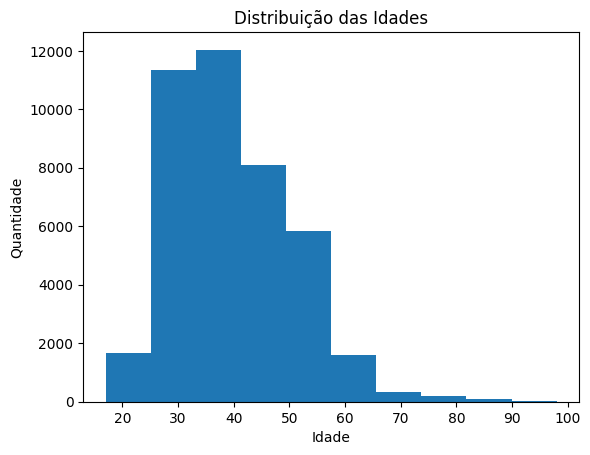

In [11]:
ages = dados['age']
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.hist(ages)
plt.plot()

# Testes de Hipótese

# Problema de Pesquisa